# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

## Load the Data

In [ ]:
df = pd.read_csv('Traffic_Accident.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [ ]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


In [ ]:
df.shape

(52000, 30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   52000 non-null  int64  
 1   Accident_Index                               52000 non-null  object 
 2   Location_Easting_OSGR                        52000 non-null  float64
 3   Location_Northing_OSGR                       52000 non-null  float64
 4   Longitude                                    52000 non-null  float64
 5   Latitude                                     52000 non-null  float64
 6   Police_Force                                 52000 non-null  int64  
 7   Accident_Severity                            52000 non-null  int64  
 8   Number_of_Vehicles                           51198 non-null  float64
 9   Number_of_Casualties                         52000 non-null  int64  
 10

In [ ]:
df.dtypes

,0
Unnamed: 0,int64
Accident_Index,object
Location_Easting_OSGR,float64
Location_Northing_OSGR,float64
Longitude,float64
Latitude,float64
Police_Force,int64
Accident_Severity,int64
Number_of_Vehicles,float64
Number_of_Casualties,int64


In [ ]:
df.describe()

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51198.000000,52000.000000,51463.000000,51999.000000,51999.000000,51999.000000,50959.000000,51999.000000,51999.000000,51999.000000,51999.0
mean,52309.605596,439654.064615,338794.330769,-1.425829,52.940991,11.101904,2.848481,1.843060,1.358615,4.120009,155.142060,4.084155,1025.653859,36.768971,2.933383,340.922479,1.249736,2005.0
std,30282.566278,66711.811588,115731.113185,0.975537,1.044812,9.558172,0.390890,0.708149,0.804162,1.934134,114.153616,1.415258,1882.560604,12.707643,3.138719,1205.580339,0.432953,0.0
min,0.000000,296780.000000,156110.000000,-3.596752,51.289060,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,-1.000000,-1.000000,1.000000,2005.0
25%,25924.750000,388110.000000,194160.000000,-2.179555,51.630849,1.000000,3.000000,1.000000,1.000000,2.000000,32.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2005.0
50%,52285.500000,429505.000000,361950.000000,-1.552874,53.149640,10.000000,3.000000,2.000000,1.000000,4.000000,142.000000,3.000000,74.000000,30.000000,4.000000,0.000000,1.000000,2005.0
75%,78552.250000,516010.000000,415952.500000,-0.312861,53.638514,20.000000,3.000000,2.000000,1.000000,6.000000,254.000000,6.000000,642.000000,40.000000,6.000000,0.000000,1.000000,2005.0
max,104949.000000,559570.000000,656390.000000,0.350177,55.800830,48.000000,3.000000,18.000000,23.000000,7.000000,570.000000,6.000000,9999.000000,70.000000,6.000000,9711.000000,3.000000,2005.0


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,802
Number_of_Casualties,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns

In [ ]:
# Further Cleaning
for col in categorical_columns:
    print(df[col].value_counts())

Accident_Index
2.01E+12         13022
200520G026802        1
200506P025749        1
200532C000405        1
200501TX20059        1
                 ...  
20053102A1000        1
200501QK50403        1
200501QA10185        1
200522EC31149        1
2005160D02810        1
Name: count, Length: 38979, dtype: int64
Date
21/10/2005    249
07/11/2005    215
08/11/2005    211
30/09/2005    207
02/12/2005    202
             ... 
03/01/2005     75
02/01/2005     74
29/12/2005     68
25/12/2005     60
24              1
Name: count, Length: 366, dtype: int64
Time
17:30    501
17:00    485
16:00    474
18:00    465
15:30    460
        ... 
04:11      1
05:04      1
03:53      1
04:26      1
04:48      1
Name: count, Length: 1420, dtype: int64
Local_Authority_(Highway)
E10000017    2237
E08000025    2064
E10000028    1556
E10000007    1332
E10000024    1290
             ... 
E09000001     166
E06000005     165
E06000003     146
E06000001     100
EHEATHROW      37
Name: count, Length: 103, dtype: int6

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['number']).columns

In [ ]:
#imputation
df["Number_of_Vehicles"].fillna(df["Number_of_Vehicles"].mode()[0], inplace = True)
df["Day_of_Week"].fillna(df["Day_of_Week"].mode()[0], inplace = True)
df["Speed_limit"].fillna(df["Speed_limit"].mode()[0], inplace = True)
df["Pedestrian_Crossing-Physical_Facilities"].fillna(df["Pedestrian_Crossing-Physical_Facilities"].mode()[0], inplace = True)
df["Pedestrian_Crossing-Human_Control"].fillna(df["Pedestrian_Crossing-Human_Control"].mode()[0], inplace = True)
df["LSOA_of_Accident_Location"].fillna(df["LSOA_of_Accident_Location"].mode()[0], inplace = True)

In [ ]:
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
StandardScaler().fit_transform(df[numerical_columns])

array([[-0.86603285, -0.34644717, -0.86421208, ..., -0.28278975,
         1.73291732,  0.        ],
       [-0.39174946, -0.46707276, -0.38607263, ..., -0.28278975,
        -0.57682476,  0.        ],
       [ 1.14832247, -1.39483565,  1.12631997, ...,  0.093796  ,
        -0.57682476,  0.        ],
       ...,
       [ 1.3030192 , -1.39336672,  1.27865607, ..., -0.28278975,
        -0.57682476,  0.        ],
       [-0.19268234,  1.07928514, -0.17031133, ..., -0.28278975,
         1.73291732,  0.        ],
       [ 1.05403541,  0.77443765,  1.11910233, ..., -0.28278975,
        -0.57682476,  0.        ]])

In [ ]:
le = LabelEncoder()
df[categorical_columns] = df[categorical_columns].apply(le.fit_transform)

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


Chose Longitude and latitude for its ability to be clustred and plotted

feature selection

In [ ]:
df1 = df[['Longitude','Latitude']]

In [ ]:
pca = PCA(n_components=2)
pca1 = pca.fit_transform(df1)

In [ ]:
n_components = pca.n_components_
df_pca = pd.DataFrame(pca1, columns=['PC{}'.format(i+1) for i in range(n_components)])
print(df_pca)

            PC1       PC2
0      0.370684  0.851497
1     -0.052254  0.598244
2     -1.782980  0.190123
3      0.062815  0.739012
4      0.076618  0.290146
...         ...       ...
51995  1.184223 -0.974977
51996 -0.120490 -0.139525
51997 -1.891162  0.082869
51998  0.883542 -0.642685
51999 -0.250184 -1.332466

[52000 rows x 2 columns]


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

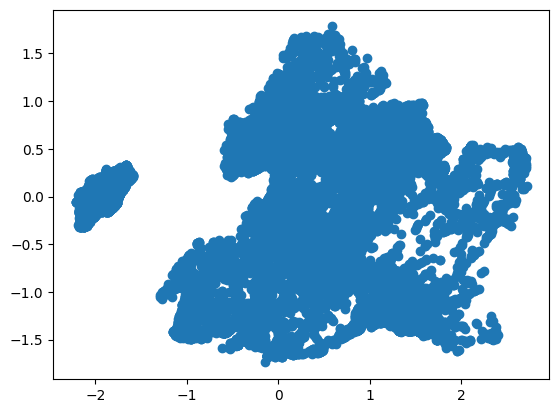

In [ ]:
plt.scatter(df_pca['PC1'], df_pca['PC2'])

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [ ]:
from sklearn.cluster import KMeans
inertias = []
for i in range(1, 9):
    km = KMeans(n_clusters=i).fit(df_pca)
    inertias.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

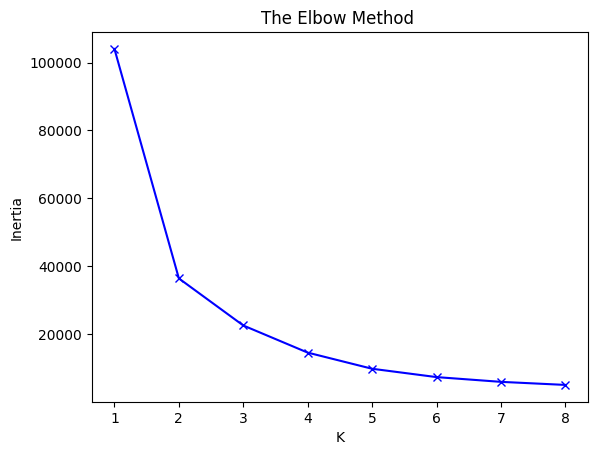

In [ ]:
plt.plot(range(1, 9), inertias, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('The Elbow Method ')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(df_pca)
y_km = km.fit_predict(df_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Evaluation
Evaluate the clustering result using appropriate metrics.


In [ ]:
score = silhouette_score(df_pca, y_km)
print('Clustring Silhouette Score ', score)

Clustring Silhouette Score  0.5788003200709831


## Plot the data points with their predicted cluster center

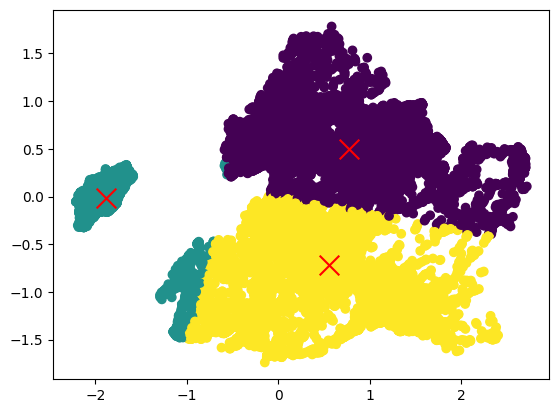

In [ ]:
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200);


## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

1-
(Longtitude and Latitude)
I picked them for its explanative nature for our proplem in determining geographical clusters of our data

2-
I chose 3 clusters base on elbow method graph that approximately determines what is the best number of clusters to use

3-
I used silhouette_score to evaluate the clustering because we don't have labels, silhouette_score serves us in this situation to measure the distances between data points and gives a score based on that

4-
I think implementing DBSCAN worth trying to see if it performs better or not on this dataset. Morover Neural networks could easily do this task without the need for extra work or determining the cluster numbers
